In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [3]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")

In [4]:
raw_data = pd.read_csv(data_path)

In [5]:
## Clean up the data - remove first three rows that bad data
raw_data = raw_data.iloc[3:]
## Make the first row the column headers
raw_data.columns = raw_data.iloc[0]
## Remove the first row
raw_data = raw_data.iloc[1:]

In [6]:
#Remove the bad column
raw_data = raw_data.drop('Rape\n(revised\ndefinition)1',1)

In [7]:
raw_data.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [8]:
#Rename the columns to make it easier to code with
raw_data = raw_data.rename(columns={'Violent\ncrime': 'ViolentCrime',
                                    'Murder and\nnonnegligent\nmanslaughter': 'Murder',
                                    'Rape\n(legacy\ndefinition)2':'Rape',
                                    'Aggravated\nassault':'AggravatedAssault',
                                    'Property\ncrime':'PropertyCrime',
                                    'Larceny-\ntheft':'LarcenyTheft',
                                    'Motor\nvehicle\ntheft':'MotorTheft',
                                    'Arson3':'Arson'})

In [9]:
raw_data.dtypes

3
City                 object
Population           object
ViolentCrime         object
Murder               object
Rape                 object
Robbery              object
AggravatedAssault    object
PropertyCrime        object
Burglary             object
LarcenyTheft         object
MotorTheft           object
Arson                object
dtype: object

In [10]:
#Clean data to remove commas
raw_data['Population'] = raw_data['Population'].str.replace(',', '')
raw_data['ViolentCrime'] = raw_data['ViolentCrime'].str.replace(',', '')
raw_data['Murder'] = raw_data['Murder'].str.replace(',', '')
raw_data['Rape'] = raw_data['Rape'].str.replace(',', '')
raw_data['Robbery'] = raw_data['Robbery'].str.replace(',', '')
raw_data['AggravatedAssault'] = raw_data['AggravatedAssault'].str.replace(',', '')
raw_data['PropertyCrime'] = raw_data['PropertyCrime'].str.replace(',', '')
raw_data['Burglary'] = raw_data['Burglary'].str.replace(',', '')
raw_data['LarcenyTheft'] = raw_data['LarcenyTheft'].str.replace(',', '')
raw_data['MotorTheft'] = raw_data['MotorTheft'].str.replace(',', '')
raw_data['Arson'] = raw_data['Arson'].str.replace(',', '')

In [11]:
#Clean data to convert to float
raw_data['Population'] = raw_data['Population'].astype(float)
raw_data['ViolentCrime'] = raw_data['ViolentCrime'].astype(float)
raw_data['Murder'] = raw_data['Murder'].astype(float)
raw_data['Rape'] = raw_data['Rape'].astype(float)
raw_data['Robbery'] = raw_data['Robbery'].astype(float)
raw_data['AggravatedAssault'] = raw_data['AggravatedAssault'].astype(float)
raw_data['PropertyCrime'] = raw_data['PropertyCrime'].astype(float)
raw_data['Burglary'] = raw_data['Burglary'].astype(float)
raw_data['LarcenyTheft'] = raw_data['LarcenyTheft'].astype(float)
raw_data['MotorTheft'] = raw_data['MotorTheft'].astype(float)
raw_data['Arson'] = raw_data['Arson'].astype(float)

In [69]:
raw_data.head()

3,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,MotorTheft,Arson
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [97]:
model_data = raw_data.filter(['City','Population','Murder','Robbery','PropertyCrime'], axis=1)

In [14]:
raw_data.dtypes

3
City                  object
Population           float64
ViolentCrime         float64
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime        float64
Burglary             float64
LarcenyTheft         float64
MotorTheft           float64
Arson                float64
dtype: object

In [86]:
model_data.dtypes

3
City              object
Population          bool
Murder           float64
Robbery          float64
PropertyCrime    float64
dtype: object

In [128]:
# Create feature variables - Population^2, If/Else statements with Murder/Robbery
#model_data['Population_2'] = model_data['Population']**2
model_data['Murder'] = model_data['Murder'].clip_upper(1)
model_data['Robbery'] = model_data['Robbery'].clip_upper(1)
model_data = model_data.fillna(0)
#model_data = model_data.drop('Population_2', 1)

In [129]:
model_data.head()

3,City,Population,Murder,Robbery,PropertyCrime
4,Adams Village,1861.0,0.0,0.0,12.0
5,Addison Town and Village,2577.0,0.0,0.0,24.0
6,Akron Village,2846.0,0.0,0.0,16.0
7,Albany,0.0,1.0,1.0,0.0
8,Albion Village,0.0,0.0,1.0,0.0


In [122]:
model_data['Population'].max()

3991.0

In [117]:
# Keep population column values +/- 3 standard deviations from the mean to remove outliers

model_data['Population']=model_data['Population'][np.abs(model_data['Population']-model_data['Population'].mean()) <= (3*model_data['Population'].std())]

In [115]:
model_data['Population'] = raw_data['Population']

In [121]:
# Remove outliers greater than 4000
model_data['Population'] = model_data['Population'][model_data['Population'] < 4000]

In [124]:
# Remove outliers greater than 150
model_data['PropertyCrime'] = model_data['PropertyCrime'][model_data['PropertyCrime'] < 150]

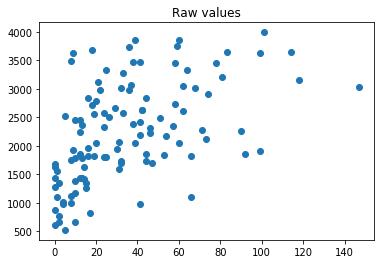

In [125]:
plt.scatter(model_data['PropertyCrime'], model_data['Population'])
plt.title('Raw values')
plt.show()

In [131]:
regr = linear_model.LinearRegression()
Y = model_data['PropertyCrime'].values.reshape(-1, 1)
X = model_data[['Population','Murder','Robbery']]
regr.fit(X, Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.82101842e-03 -1.89534927e+01 -9.80815134e-01]]

Intercept: 
 [29.11837284]

R-squared:
0.05450469910447453


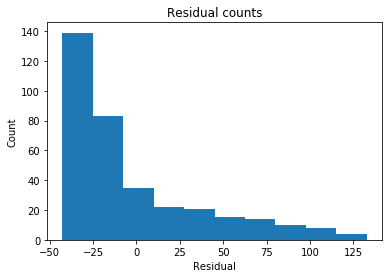

In [132]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = model_data['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

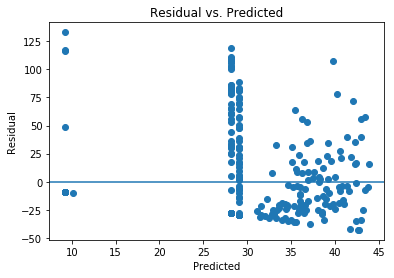

In [133]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [134]:
correlation_matrix = X.corr()
display(correlation_matrix)

3,Population,Murder,Robbery
3,,,
Population,1.000000,-0.255740,-0.439842
Murder,-0.255740,1.000000,0.315272
Robbery,-0.439842,0.315272,1.000000
